# Tutorial Minería de Datos - Unidades 1, 2 y 3

## Maestría en Data Mining – UTN Regional Paraná

### Contenido:
- **Unidad 1:** Introducción a Data Mining
- **Unidad 2:** Exploración de Datos  
- **Unidad 3:** Preparación de Datos

---


# Unidad 1: Introducción a Data Mining

## 🔍 Definición de Data Mining
**Data Mining** es el proceso de **descubrir patrones útiles** en grandes volúmenes de datos usando técnicas automáticas o semi-automáticas.

## 📊 Proceso KDD (Knowledge Discovery in Databases)
1. **Selección** - Elegir datos relevantes
2. **Preprocesamiento** - Limpiar y transformar datos
3. **Transformación** - Formato adecuado para mining
4. **Data Mining** - Aplicar algoritmos
5. **Interpretación/Evaluación** - Analizar resultados

## 🎯 Tipos de Aprendizaje

### Supervisado
- **Objetivo:** Predecir una variable target conocida
- **Ejemplos:** Clasificación, Regresión
- **Algoritmos:** Árboles de decisión, SVM, Random Forest

### No Supervisado  
- **Objetivo:** Encontrar patrones ocultos sin variable target
- **Ejemplos:** Clustering, Reglas de asociación
- **Algoritmos:** K-means, Apriori, DBSCAN

## 🛠️ Principales Técnicas de DM
- **Clasificación:** Predecir categorías
- **Regresión:** Predecir valores numéricos  
- **Clustering:** Agrupar datos similares
- **Reglas de Asociación:** Encontrar relaciones entre items
- **Detección de Anomalías:** Identificar outliers

## 🏭 Aplicaciones por Industria
- **Retail:** Market basket analysis, sistemas de recomendación
- **Finanzas:** Detección de fraude, credit scoring
- **Salud:** Diagnóstico, análisis de medicamentos
- **Marketing:** Segmentación de clientes, campañas


# Unidad 2: Exploración de Datos

## 📋 Tipos de Variables

### Categóricas
- **Nominales:** Sin orden (color, género)
- **Ordinales:** Con orden (satisfacción: bajo, medio, alto)

### Numéricas
- **Discretas:** Valores enteros (número de hijos)
- **Continuas:** Valores reales (peso, altura)

## 📈 Estadísticas Descriptivas
- **Tendencia central:** Media, mediana, moda
- **Dispersión:** Varianza, desviación estándar, rango
- **Forma:** Asimetría, curtosis

## 📊 Visualización de Datos
- **Histogramas:** Distribución de variables numéricas
- **Box plots:** Resumen de 5 números + outliers
- **Scatter plots:** Relación entre 2 variables numéricas
- **Bar charts:** Frecuencias de variables categóricas

## 🔗 Correlaciones
- **Pearson:** Variables numéricas (lineal)
- **Spearman:** Variables ordinales (monótona)
- **Cramer's V:** Variables categóricas

## 🚨 Calidad de Datos
- **Missing values:** Datos faltantes
- **Outliers:** Valores extremos o anómalos
- **Inconsistencias:** Formatos diferentes
- **Duplicados:** Registros repetidos


In [2]:
# Librerías necesarias para exploración de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

print("✅ Librerías cargadas correctamente")


✅ Librerías cargadas correctamente


In [3]:
# Crear dataset de ejemplo para exploración
np.random.seed(42)

# Generar datos de ejemplo: ventas de una tienda
n = 1000
data = {
    'edad': np.random.normal(35, 12, n).astype(int),
    'ingresos': np.random.normal(50000, 15000, n),
    'gasto_total': np.random.normal(500, 200, n),
    'categoria_cliente': np.random.choice(['Bronze', 'Silver', 'Gold'], n, p=[0.6, 0.3, 0.1]),
    'canal_compra': np.random.choice(['Online', 'Tienda', 'App'], n, p=[0.4, 0.4, 0.2]),
    'satisfaccion': np.random.choice(['Bajo', 'Medio', 'Alto'], n, p=[0.2, 0.5, 0.3])
}

# Agregar algunos valores missing y outliers intencionalmente
data['ingresos'][np.random.choice(n, 50, replace=False)] = np.nan  # Missing values
data['gasto_total'][np.random.choice(n, 20, replace=False)] *= 5   # Outliers

df = pd.DataFrame(data)

print("📊 Dataset creado:")
print(f"Forma: {df.shape}")
print("\nPrimeras 5 filas:")
df.head()


📊 Dataset creado:
Forma: (1000, 6)

Primeras 5 filas:


,edad,ingresos,gasto_total,categoria_cliente,canal_compra,satisfaccion
0,40,70990.331549,364.964345,Silver,App,Medio
1,33,63869.505244,471.096266,Gold,Online,Alto
2,42,50894.455549,341.516016,Bronze,App,Medio
3,53,40295.948334,438.407694,Gold,Tienda,Bajo
4,32,NaN,121.277067,Bronze,Online,Medio


In [4]:
# 📊 Exploración básica del dataset

print("=== INFORMACIÓN GENERAL ===")
print(f"Forma del dataset: {df.shape}")
print(f"Tipos de datos:\n{df.dtypes}")

print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
# Variables numéricas
print("Variables numéricas:")
print(df.describe())

print("\n=== INFORMACIÓN DE CALIDAD DE DATOS ===")
print("Valores missing por columna:")
print(df.isnull().sum())

print("\nDuplicados:")
print(f"Filas duplicadas: {df.duplicated().sum()}")

print("\n=== VARIABLES CATEGÓRICAS ===")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


=== INFORMACIÓN GENERAL ===
Forma del dataset: (1000, 6)
Tipos de datos:
edad                   int64
ingresos             float64
gasto_total          float64
categoria_cliente     object
canal_compra          object
satisfaccion          object
dtype: object

=== ESTADÍSTICAS DESCRIPTIVAS ===
Variables numéricas:
              edad      ingresos  gasto_total
count  1000.000000    950.000000  1000.000000
mean     34.743000  51029.697272   539.186485
std      11.748233  15059.255745   358.651289
min      -3.000000   5894.170480  -103.902431
25%      27.000000  40802.579880   374.685237
50%      35.000000  51011.346708   504.335238
75%      42.000000  60970.811657   638.102102
max      81.000000  97896.613518  4718.780233

=== INFORMACIÓN DE CALIDAD DE DATOS ===
Valores missing por columna:
edad                  0
ingresos             50
gasto_total           0
categoria_cliente     0
canal_compra          0
satisfaccion          0
dtype: int64

Duplicados:
Filas duplicadas: 0

=== VARI

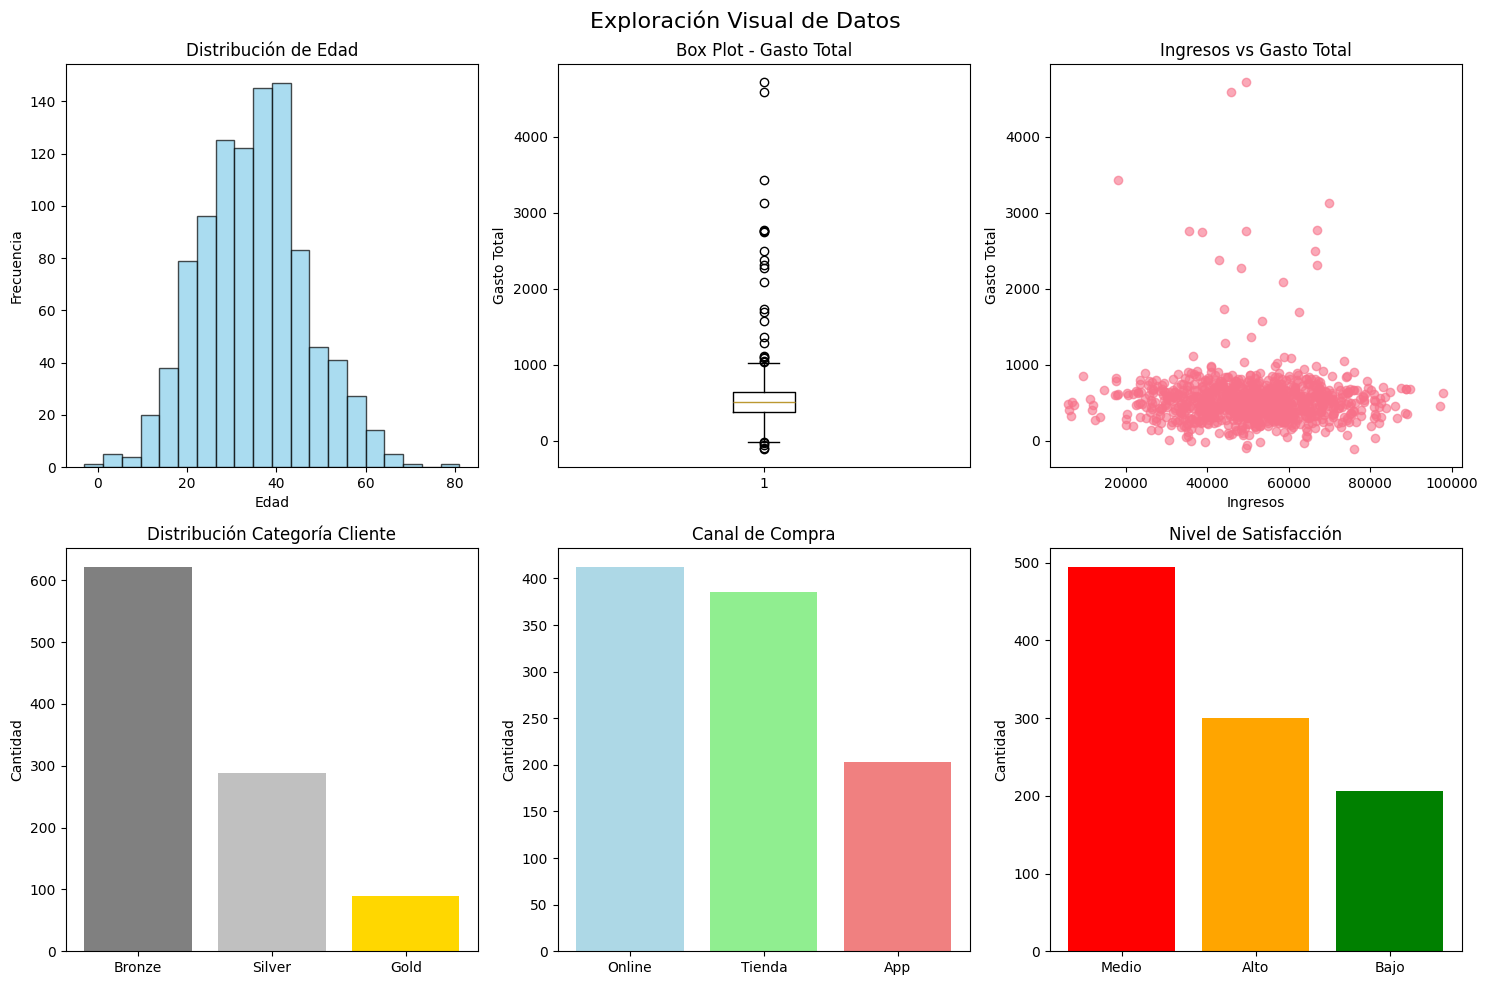

In [7]:
# 📈 Visualización de Datos

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Exploración Visual de Datos', fontsize=16)

# 1. Histograma - Distribución de edad
axes[0,0].hist(df['edad'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribución de Edad')
axes[0,0].set_xlabel('Edad')
axes[0,0].set_ylabel('Frecuencia')

# 2. Box plot - Gasto total (muestra outliers)
axes[0,1].boxplot(df['gasto_total'].dropna())
axes[0,1].set_title('Box Plot - Gasto Total')
axes[0,1].set_ylabel('Gasto Total')

# 3. Scatter plot - Ingresos vs Gasto
df_clean = df.dropna(subset=['ingresos', 'gasto_total'])
axes[0,2].scatter(df_clean['ingresos'], df_clean['gasto_total'], alpha=0.6)
axes[0,2].set_title('Ingresos vs Gasto Total')
axes[0,2].set_xlabel('Ingresos')
axes[0,2].set_ylabel('Gasto Total')

# 4. Bar chart - Categoría cliente
categoria_counts = df['categoria_cliente'].value_counts()
axes[1,0].bar(categoria_counts.index, categoria_counts.values, color=['gray', 'silver', 'gold'])
axes[1,0].set_title('Distribución Categoría Cliente')
axes[1,0].set_ylabel('Cantidad')

# 5. Bar chart - Canal de compra
canal_counts = df['canal_compra'].value_counts()
axes[1,1].bar(canal_counts.index, canal_counts.values, color=['lightblue', 'lightgreen', 'lightcoral'])
axes[1,1].set_title('Canal de Compra')
axes[1,1].set_ylabel('Cantidad')

# 6. Bar chart - Satisfacción
satisf_counts = df['satisfaccion'].value_counts()
axes[1,2].bar(satisf_counts.index, satisf_counts.values, color=['red', 'orange', 'green'])
axes[1,2].set_title('Nivel de Satisfacción')
axes[1,2].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


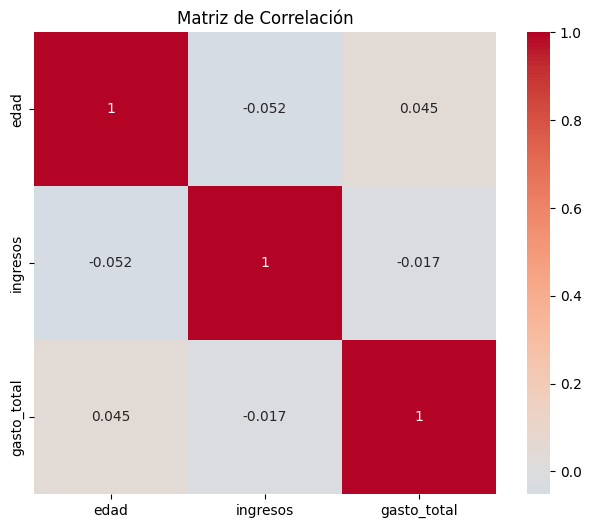

🔢 Correlaciones más fuertes:

📊 Correlaciones categóricas (Cramer's V):
categoria_cliente ↔ canal_compra: 0.027
categoria_cliente ↔ satisfaccion: 0.000
canal_compra ↔ satisfaccion: 0.000


In [8]:
# 🔗 Análisis de Correlaciones

# Matriz de correlación para variables numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Matriz de Correlación')
plt.show()

print("🔢 Correlaciones más fuertes:")
# Encontrar correlaciones > 0.3 (excluyendo diagonal)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            print(f"{col1} ↔ {col2}: {corr_val:.3f}")

# Correlación entre variables categóricas usando Cramer's V
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calcula Cramer's V para variables categóricas"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("\n📊 Correlaciones categóricas (Cramer's V):")
categorical_cols = df.select_dtypes(include=['object']).columns
for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        col1, col2 = categorical_cols[i], categorical_cols[j]
        cramers = cramers_v(df[col1], df[col2])
        print(f"{col1} ↔ {col2}: {cramers:.3f}")


🔍 Detección de Outliers
Variable: gasto_total
Outliers por IQR: 28 (2.8%)
Límites IQR: [-20.44, 1033.23]
Outliers por Z-score: 15 (1.5%)


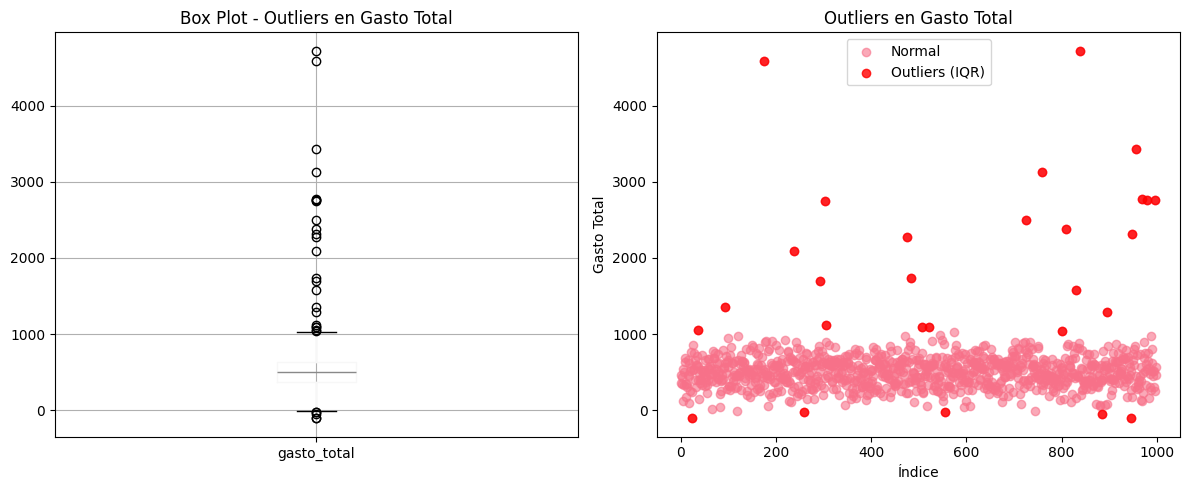


📊 Algunos outliers extremos:
     edad  gasto_total categoria_cliente
838    46  4718.780233              Gold
175    44  4589.538722            Bronze
956    39  3432.191564            Bronze
759    43  3122.711224            Bronze
969    17  2770.057358            Bronze


In [9]:
# 🚨 Detección de Outliers

def detect_outliers_iqr(data, column):
    """Detecta outliers usando método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detecta outliers usando Z-score"""
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outliers = data[z_scores > threshold]
    return outliers

print("🔍 Detección de Outliers")
print("="*50)

# Analizar outliers en 'gasto_total'
outliers_iqr, lower, upper = detect_outliers_iqr(df, 'gasto_total')
outliers_zscore = detect_outliers_zscore(df, 'gasto_total')

print(f"Variable: gasto_total")
print(f"Outliers por IQR: {len(outliers_iqr)} ({len(outliers_iqr)/len(df)*100:.1f}%)")
print(f"Límites IQR: [{lower:.2f}, {upper:.2f}]")
print(f"Outliers por Z-score: {len(outliers_zscore)} ({len(outliers_zscore)/len(df)*100:.1f}%)")

# Visualizar outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Box plot con outliers marcados
df.boxplot(column='gasto_total', ax=ax1)
ax1.set_title('Box Plot - Outliers en Gasto Total')

# Scatter plot con outliers marcados
ax2.scatter(df.index, df['gasto_total'], alpha=0.6, label='Normal')
ax2.scatter(outliers_iqr.index, outliers_iqr['gasto_total'], 
           color='red', alpha=0.8, label='Outliers (IQR)')
ax2.set_title('Outliers en Gasto Total')
ax2.set_xlabel('Índice')
ax2.set_ylabel('Gasto Total')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\n📊 Algunos outliers extremos:")
top_outliers = outliers_iqr.nlargest(5, 'gasto_total')[['edad', 'gasto_total', 'categoria_cliente']]
print(top_outliers)


# Unidad 3: Preparación de Datos

## 🔧 Importancia de la Preparación
- **80% del tiempo** en proyectos de Data Mining se dedica a preparación
- **Calidad de entrada = Calidad de salida** (GIGO: Garbage In, Garbage Out)
- Datos bien preparados = **Mejores resultados** del modelo

## 📊 Principales Técnicas de Preparación

### 1. **Agregación**
- Combinar múltiples valores en uno
- Ej: Ventas diarias → Ventas mensuales

### 2. **Muestreo** 
- Reducir tamaño del dataset manteniendo representatividad
- **Random sampling, Stratified sampling**

### 3. **Discretización**
- Convertir variables continuas en categóricas
- Ej: Edad (25, 30, 45) → ('Joven', 'Adulto', 'Mayor')

### 4. **Transformaciones**
- **Log transformation:** Para datos con sesgo
- **Square root:** Para reducir varianza
- **Box-Cox:** Transformación generalizada

### 5. **Normalización/Estandarización**
- **Min-Max:** Escalar a rango [0,1]
- **Z-score:** Media=0, Desv.Std=1
- **Robust:** Usa mediana y MAD

### 6. **Variables Dummy**
- Convertir categóricas en numéricas
- **One-hot encoding:** Crear columnas binarias

### 7. **Creación de Variables**
- **Feature engineering:** Nuevas variables derivadas
- **Binning:** Agrupar valores en rangos
- **Ratios:** Relaciones entre variables

### 8. **Selección de Variables**
- **Filter methods:** Correlación, Chi-square
- **Wrapper methods:** Forward/Backward selection
- **Embedded methods:** Lasso, Random Forest importance


In [19]:
# 🔧 Implementación de Técnicas de Preparación de Datos

# Librerías adicionales para preparación
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import pandas as pd

# Crear una copia del dataset para trabajar
df_prep = df.copy()

print("🔄 Dataset original:")
print(f"Forma: {df_prep.shape}")
print(f"Missing values: {df_prep.isnull().sum().sum()}")

# 1. MANEJO DE MISSING VALUES
print("\n=== 1. TRATAMIENTO DE MISSING VALUES ===")

# Estrategias para valores faltantes
# Imputar ingresos con la mediana (más robusta que la media)
median_income = df_prep['ingresos'].median()
df_prep['ingresos'].fillna(median_income, inplace=True)

print(f"✅ Missing values eliminados: {df_prep.isnull().sum().sum()}")
print(f"Mediana de ingresos usada para imputación: ${median_income:,.2f}")


🔄 Dataset original:
Forma: (1000, 6)
Missing values: 50

=== 1. TRATAMIENTO DE MISSING VALUES ===
✅ Missing values eliminados: 0
Mediana de ingresos usada para imputación: $51,011.35


In [20]:
# 2. DISCRETIZACIÓN
print("\n=== 2. DISCRETIZACIÓN ===")

# Discretizar edad en grupos
bins_edad = [0, 25, 35, 50, 100]
labels_edad = ['Joven', 'Adulto_Joven', 'Adulto', 'Mayor']
df_prep['edad_grupo'] = pd.cut(df_prep['edad'], bins=bins_edad, labels=labels_edad, include_lowest=True)

# Discretizar ingresos en quartiles
df_prep['ingresos_cuartil'] = pd.qcut(df_prep['ingresos'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

print("Distribución de grupos de edad:")
print(df_prep['edad_grupo'].value_counts())
print("\nDistribución de cuartiles de ingresos:")
print(df_prep['ingresos_cuartil'].value_counts())

# 3. NORMALIZACIÓN
print("\n=== 3. NORMALIZACIÓN/ESTANDARIZACIÓN ===")

# Variables numéricas para normalizar
numeric_cols = ['edad', 'ingresos', 'gasto_total']

# Min-Max Scaling (0-1)
scaler_minmax = MinMaxScaler()
for col in numeric_cols:
    df_prep[f'{col}_minmax'] = scaler_minmax.fit_transform(df_prep[[col]])

# Z-score Standardization
scaler_std = StandardScaler()
for col in numeric_cols:
    df_prep[f'{col}_std'] = scaler_std.fit_transform(df_prep[[col]])

print("Ejemplo de normalización - Variable 'edad':")
print(f"Original: min={df_prep['edad'].min()}, max={df_prep['edad'].max()}")
print(f"Min-Max: min={df_prep['edad_minmax'].min():.3f}, max={df_prep['edad_minmax'].max():.3f}")
print(f"Z-score: media={df_prep['edad_std'].mean():.3f}, std={df_prep['edad_std'].std():.3f}")

# 4. VARIABLES DUMMY (ONE-HOT ENCODING)
print("\n=== 4. VARIABLES DUMMY ===")

# One-hot encoding para variables categóricas
df_dummies = pd.get_dummies(df_prep[['categoria_cliente', 'canal_compra', 'satisfaccion']], 
                           prefix=['cat', 'canal', 'satisf'])

print(f"Variables dummy creadas: {df_dummies.shape[1]}")
print("Nuevas columnas:")
print(df_dummies.columns.tolist())



=== 2. DISCRETIZACIÓN ===
Distribución de grupos de edad:
edad_grupo
Adulto          374
Adulto_Joven    309
Joven           218
Mayor            98
Name: count, dtype: int64

Distribución de cuartiles de ingresos:
ingresos_cuartil
Q2    275
Q1    250
Q4    250
Q3    225
Name: count, dtype: int64

=== 3. NORMALIZACIÓN/ESTANDARIZACIÓN ===
Ejemplo de normalización - Variable 'edad':
Original: min=-3, max=81
Min-Max: min=0.000, max=1.000
Z-score: media=-0.000, std=1.001

=== 4. VARIABLES DUMMY ===
Variables dummy creadas: 9
Nuevas columnas:
['cat_Bronze', 'cat_Gold', 'cat_Silver', 'canal_App', 'canal_Online', 'canal_Tienda', 'satisf_Alto', 'satisf_Bajo', 'satisf_Medio']


In [18]:
# 5. CREACIÓN DE VARIABLES (FEATURE ENGINEERING)
print("\n=== 5. FEATURE ENGINEERING ===")

# Crear nuevas variables derivadas
df_prep['ratio_gasto_ingreso'] = df_prep['gasto_total'] / df_prep['ingresos']
df_prep['gasto_per_capita'] = df_prep['gasto_total'] / df_prep['edad']  # Gasto por año de vida
df_prep['es_cliente_premium'] = (df_prep['categoria_cliente'] == 'Gold').astype(int)
df_prep['gasto_alto'] = (df_prep['gasto_total'] > df_prep['gasto_total'].quantile(0.75)).astype(int)

# Binning de gasto total
df_prep['gasto_bin'] = pd.cut(df_prep['gasto_total'], 
                             bins=3, 
                             labels=['Bajo', 'Medio', 'Alto'])

# Transformación logarítmica para variables con sesgo
df_prep['log_ingresos'] = np.log1p(df_prep['ingresos'])  # log1p es log(1+x) para evitar log(0)

print("Nuevas variables creadas:")
new_vars = ['ratio_gasto_ingreso', 'gasto_per_capita', 'es_cliente_premium', 'gasto_alto', 'gasto_bin', 'log_ingresos']
for var in new_vars:
    if df_prep[var].dtype == 'object':
        print(f"{var}: {df_prep[var].value_counts().to_dict()}")
    else:
        print(f"{var}: media={df_prep[var].mean():.3f}, std={df_prep[var].std():.3f}")

# 6. MUESTREO
print("\n=== 6. MUESTREO ===")

# Muestreo aleatorio simple
sample_random = df_prep.sample(n=500, random_state=42)
print(f"Muestra aleatoria: {sample_random.shape[0]} registros")

# Muestreo estratificado por categoría de cliente
sample_stratified = df_prep.groupby('categoria_cliente', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), 100), random_state=42)
)
print(f"Muestra estratificada: {sample_stratified.shape[0]} registros")
print("Distribución por categoría:")
print(sample_stratified['categoria_cliente'].value_counts())



=== 5. FEATURE ENGINEERING ===
Nuevas variables creadas:
ratio_gasto_ingreso: media=0.012, std=0.011
gasto_per_capita: media=17.909, std=19.077
es_cliente_premium: media=0.090, std=0.286
gasto_alto: media=0.250, std=0.433


TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [ ]:
# 7. SELECCIÓN DE VARIABLES
print("\n=== 7. SELECCIÓN DE VARIABLES ===")

# Preparar datos para selección de variables
# Combinar variables numéricas originales con las dummy
numeric_features = df_prep[['edad', 'ingresos', 'gasto_total', 'ratio_gasto_ingreso']].select_dtypes(include=[np.number])
combined_features = pd.concat([numeric_features, df_dummies], axis=1)

# Variable objetivo binaria (ejemplo: gasto alto)
target = df_prep['gasto_alto']

# Filtrar métodos de selección
# 1. Correlación con variable objetivo
correlations = combined_features.corrwith(target).abs().sort_values(ascending=False)
print("🔢 Top 5 variables por correlación con 'gasto_alto':")
print(correlations.head())

# 2. Selección univariada (F-statistic)
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(combined_features, target)
selected_features = combined_features.columns[selector.get_support()]

print(f"\n📊 Top 5 variables por F-statistic:")
feature_scores = pd.DataFrame({
    'Feature': combined_features.columns,
    'Score': selector.scores_,
    'Selected': selector.get_support()
})
print(feature_scores.nlargest(5, 'Score')[['Feature', 'Score']])

# 8. TRATAMIENTO DE OUTLIERS
print("\n=== 8. TRATAMIENTO DE OUTLIERS ===")

# Diferentes estrategias para outliers
df_no_outliers = df_prep.copy()

# Método 1: Eliminación (IQR)
Q1 = df_no_outliers['gasto_total'].quantile(0.25)
Q3 = df_no_outliers['gasto_total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (df_no_outliers['gasto_total'] < lower_bound) | (df_no_outliers['gasto_total'] > upper_bound)
print(f"Outliers detectados: {outliers_mask.sum()} ({outliers_mask.sum()/len(df_no_outliers)*100:.1f}%)")

# Opción 1: Eliminar outliers
df_sin_outliers = df_no_outliers[~outliers_mask]
print(f"Dataset sin outliers: {df_sin_outliers.shape[0]} registros")

# Opción 2: Winsorizar (cap values)
df_winsorized = df_no_outliers.copy()
df_winsorized.loc[df_winsorized['gasto_total'] > upper_bound, 'gasto_total'] = upper_bound
df_winsorized.loc[df_winsorized['gasto_total'] < lower_bound, 'gasto_total'] = lower_bound
print(f"Dataset winsorizado: gasto_total capeado en [{lower_bound:.2f}, {upper_bound:.2f}]")

print(f"\n📈 Comparación de estrategias:")
print(f"Original: media={df_prep['gasto_total'].mean():.2f}, std={df_prep['gasto_total'].std():.2f}")
print(f"Sin outliers: media={df_sin_outliers['gasto_total'].mean():.2f}, std={df_sin_outliers['gasto_total'].std():.2f}")
print(f"Winsorizado: media={df_winsorized['gasto_total'].mean():.2f}, std={df_winsorized['gasto_total'].std():.2f}")


In [ ]:
# 🔍 Visualización: Antes vs Después de la Preparación

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparación: Antes y Después de la Preparación de Datos', fontsize=16)

# 1. Distribución original vs transformada (log)
axes[0,0].hist(df['ingresos'].dropna(), bins=30, alpha=0.7, label='Original', color='lightblue')
axes[0,0].set_title('Ingresos - Distribución Original')
axes[0,0].set_xlabel('Ingresos')
axes[0,0].set_ylabel('Frecuencia')

axes[0,1].hist(df_prep['log_ingresos'], bins=30, alpha=0.7, label='Log Transform', color='lightgreen')
axes[0,1].set_title('Ingresos - Transformación Logarítmica')
axes[0,1].set_xlabel('Log(Ingresos)')
axes[0,1].set_ylabel('Frecuencia')

# 2. Gasto total: original vs sin outliers
axes[1,0].boxplot([df['gasto_total'].dropna()], labels=['Original'])
axes[1,0].set_title('Gasto Total - Con Outliers')
axes[1,0].set_ylabel('Gasto Total')

axes[1,1].boxplot([df_sin_outliers['gasto_total']], labels=['Sin Outliers'])
axes[1,1].set_title('Gasto Total - Sin Outliers')
axes[1,1].set_ylabel('Gasto Total')

plt.tight_layout()
plt.show()

# Resumen final de la preparación
print("\n" + "="*60)
print("📋 RESUMEN DE LA PREPARACIÓN DE DATOS")
print("="*60)
print(f"✅ Dataset original: {df.shape}")
print(f"✅ Missing values tratados: {df.isnull().sum().sum()} → {df_prep.isnull().sum().sum()}")
print(f"✅ Outliers detectados: {outliers_mask.sum()}")
print(f"✅ Variables categóricas discretizadas: 2 (edad_grupo, ingresos_cuartil)")
print(f"✅ Variables dummy creadas: {df_dummies.shape[1]}")
print(f"✅ Nuevas variables derivadas: {len(new_vars)}")
print(f"✅ Variables normalizadas: {len(numeric_cols)} (Min-Max y Z-score)")
print(f"✅ Dataset final preparado: {df_prep.shape}")

print(f"\n🎯 El dataset está listo para aplicar algoritmos de Data Mining!")

# Mostrar algunas estadísticas finales
print(f"\n📊 Variables finales disponibles:")
print(f"- Numéricas originales: {len(df_prep.select_dtypes(include=[np.number]).columns)}")
print(f"- Categóricas: {len(df_prep.select_dtypes(include=['object', 'category']).columns)}")
print(f"- Total de columnas: {df_prep.shape[1]}")
